In [5]:
# Run other ipynb file to have access to its functions
%run Gorilla_random_generator.ipynb
%run Gorilla_BW_26_12.ipynb


In [6]:
# Generate a list of random meters
random_meters = generate_random_meters(5)
random_meters.head()

,meter_id,aq_kwh,exit_zone
0,90122647,944120,LC
1,52577040,329251,EA1
2,63082755,814179,LW
3,19815784,66736,LW
4,79611389,573121,EM4


In [10]:
# Generate mock consumption data 
start_date_example = '2020-06-01'
duration_days_example = 2000

mock_consumption_data = generate_mock_consumption_data(random_meters, start_date_example, duration_days_example)
mock_consumption_data.head(10)

,meter_id,date,kwh
0,19815784,2020-06-01,31.425123
1,19815784,2020-06-02,38.803818
2,19815784,2020-06-03,65.259888
3,19815784,2020-06-04,59.195466
4,19815784,2020-06-05,87.355305
5,19815784,2020-06-06,160.083937
6,19815784,2020-06-07,79.155019
7,19815784,2020-06-08,37.156204
8,19815784,2020-06-09,162.951792
9,19815784,2020-06-10,86.222996


In [8]:
meter_ids_list = random_meters['meter_id'].to_list()
df_results_random = get_results_for_multiple_ids(random_meters, meter_ids_list, mock_consumption_data, rate_data, start_date="04/05/2022", end_date="05/10/2022")
df_results_random.head()


--------------------------------------------

Meter id 19815784 with Daterange: 04/05/2022 until 05/10/2022
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 19815784 corresponds to this exit zone: LW
The meter with ID 19815784 corresponds to this aq_kwh: 66736

--------------------------------------------

Meter id 52577040 with Daterange: 04/05/2022 until 05/10/2022
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 52577040 corresponds to this exit zone: EA1
The meter with ID 52577040 corresponds to this aq_kwh: 329251

--------------------------------------------

Meter id 63082755 with Daterange: 04/05/2022 until 05/10/2022
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 63082755 corresponds to this exit zone: LW
The meter with ID 63082755 corresponds to this aq_kwh: 814179

--------------------------------------------

Meter id 79611389 with Daterange: 04/05/2022 until 05/10/2022
The da

,meter_id,total_kwh,total_charge_pounds
0,19815784,16364.758886,62.99
1,52577040,15607.303565,48.72
2,63082755,15235.133013,50.09
3,79611389,14948.729863,73.28
4,90122647,15501.110982,67.42


In [11]:
def benchmark_get_results(meter_ids_list, start_date, end_date, iterations=5):
    execution_times = []

    for _ in range(iterations):
        start_time = time.time()

        # Call the function with different inputs
        df_results = get_results_for_multiple_ids(random_meters, meter_ids_list, mock_consumption_data, rate_data, start_date, end_date)

        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

    avg_execution_time = np.mean(execution_times)
    return avg_execution_time


In [12]:
# Define different input scenarios for benchmarking
meter_ids_list_small = random_meters['meter_id'].sample(n=10, replace=True).tolist()
meter_ids_list_large = random_meters['meter_id'].sample(n=1000, replace=True).tolist()

start_date_small = "2022-05-04"
end_date_small = "2022-05-10"

start_date_large = "2022-01-01"
end_date_large = "2022-12-31"

# Perform benchmarking for different inputs
avg_time_small = benchmark_get_results(meter_ids_list_small, start_date_small, end_date_small)
avg_time_large = benchmark_get_results(meter_ids_list_large, start_date_large, end_date_large)

# Print results
print(f"Avg. Execution Time (Small Input): {avg_time_small} seconds")
print(f"Avg. Execution Time (Large Input): {avg_time_large} seconds")



--------------------------------------------

Meter id 79611389 with Daterange: 2022-05-04 until 2022-05-10
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 79611389 corresponds to this exit zone: EM4
The meter with ID 79611389 corresponds to this aq_kwh: 573121

--------------------------------------------

Meter id 19815784 with Daterange: 2022-05-04 until 2022-05-10
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 19815784 corresponds to this exit zone: LW
The meter with ID 19815784 corresponds to this aq_kwh: 66736

--------------------------------------------

Meter id 90122647 with Daterange: 2022-05-04 until 2022-05-10
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 90122647 corresponds to this exit zone: LC
The meter with ID 90122647 corresponds to this aq_kwh: 944120

--------------------------------------------

Meter id 19815784 with Daterange: 2022-05-04 until 2022-05-10
The da


--------------------------------------------

Meter id 79611389 with Daterange: 2022-05-04 until 2022-05-10
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 79611389 corresponds to this exit zone: EM4
The meter with ID 79611389 corresponds to this aq_kwh: 573121

--------------------------------------------

Meter id 19815784 with Daterange: 2022-05-04 until 2022-05-10
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 19815784 corresponds to this exit zone: LW
The meter with ID 19815784 corresponds to this aq_kwh: 66736

--------------------------------------------

Meter id 90122647 with Daterange: 2022-05-04 until 2022-05-10
The date from which on the rates are applicable is: 2022-04-01
The meter with ID 90122647 corresponds to this exit zone: LC
The meter with ID 90122647 corresponds to this aq_kwh: 944120

--------------------------------------------

Meter id 19815784 with Daterange: 2022-05-04 until 2022-05-10
The da

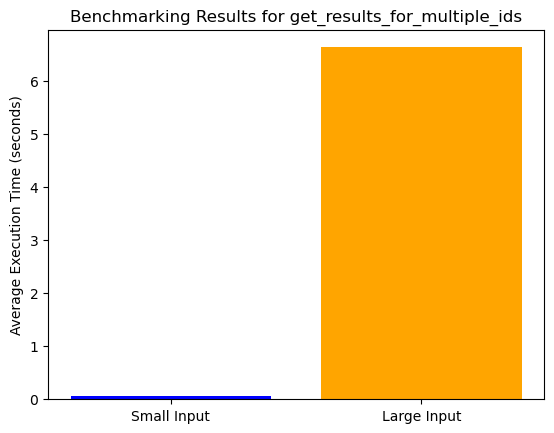

In [13]:
import matplotlib.pyplot as plt

# Perform benchmarking for different inputs
avg_time_small = benchmark_get_results(meter_ids_list_small, start_date_small, end_date_small)
avg_time_large = benchmark_get_results(meter_ids_list_large, start_date_large, end_date_large)

# Plot the results
labels = ['Small Input', 'Large Input']
execution_times = [avg_time_small, avg_time_large]

plt.bar(labels, execution_times, color=['blue', 'orange'])
plt.ylabel('Average Execution Time (seconds)')
plt.title('Benchmarking Results for get_results_for_multiple_ids')
plt.show()
